In [ ]:
!pip install wordcloud -q

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126718 files and direc

In [ ]:
import json
from google.colab import drive

# 1. Google Drive 마운트
drive.mount('/content/drive')

# 2. 파일 경로 설정
file_path = '/content/drive/MyDrive/train_data.json'
print(f"파일 경로: {file_path}")

# 2. JSON 파일 읽기 (인코딩은 'utf-8'로 지정)
try:
    with open(file_path, 'r', encoding='utf-8') as f:
        # 파일이 여러 JSON 객체의 리스트로 구성되어 있다고 가정
        data = json.load(f)
except FileNotFoundError:
    print(f"'{file_path}' 파일을 찾을 수 없습니다. Colab에 파일을 업로드했는지, 파일명이 올바른지 확인해주세요.")
    data = [] # 에러 방지를 위해 빈 리스트로 초기화
except json.JSONDecodeError:
    print(f"'{file_path}' 파일이 올바른 JSON 형식이 아닙니다. 파일 내용을 확인해주세요.")
    data = []

# 3. 고객 발화 데이터만 추출하여 새로운 리스트에 저장
customer_utterances = []
if data:
    for item in data:
        # '화자' 키가 존재하고, 그 값이 '고객'인 경우에만 처리
        if item.get('화자') == '고객':
            # '고객질문(요청)' 필드에 내용이 있으면(빈 문자열이 아니면) 리스트에 추가
            question = item.get('고객질문(요청)', '')
            if question:
                customer_utterances.append(question)

            # '고객답변' 필드에 내용이 있으면(빈 문자열이 아니면) 리스트에 추가
            answer = item.get('고객답변', '')
            if answer:
                customer_utterances.append(answer)

# 4. 결과 확인
if customer_utterances:
    print(f"✅ 총 {len(customer_utterances)}개의 고객 발화 데이터를 추출했습니다.")
    print("\n--- 추출된 데이터 샘플 (앞 5개) ---")
    for utterance in customer_utterances[:5]:
        print(utterance)
else:
    print("추출된 고객 발화 데이터가 없습니다. 원본 데이터나 코드의 필터링 조건을 확인해보세요.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
파일 경로: /content/drive/MyDrive/train_data.json
✅ 총 42472개의 고객 발화 데이터를 추출했습니다.

--- 추출된 데이터 샘플 (앞 5개) ---
인터넷뱅킹 로그인이 안돼요?
알고 있는 번호를 했는데 다 안된다고 나와요
어제 2번해서 안되서 오늘 다시 들어갔는데 안되요
오늘은 3번밖에 안 했는데요?
다시 인터넷뱅킹에 로그인 하려면 어떻게 하면 되나요?


In [ ]:
import random

# 1. 감정 분류를 위한 키워드 정의

#긍정
positive_keywords = ["감사합니다", "고맙습니다", "덕분에", "해결됐어요", "잘 알겠습니다", "네네", "좋아요", "수고하세요", "수고 많으십니다", "고생 많으십니다"]

# 부정 키워드를 4개의 카테고리로 세분화
#위협
threat_keywords = []
#모욕/욕설
insult_keywords = []
#불안
anxiety_keywords = ["걱정", "불안", "아무것도", "어떡하죠","어떻하죠","어떡해요","어떻해요", "문제 생기면", "안되면 어쩌나", "안돼요","안되요", "안되네요",  "안돼는데요","안되는데요"]
#불만/짜증
anger_keywords = ["짜증", "화가 나네요","불만", "왜이래요", "답답", "몇 번째", "처리 안해", "말도 안","참나","장난해","이게 말인가요","이게 참말입니까"]
#슬픔/좌절
sadness_keywords = ["속상", "슬프", "눈물", "희망이 없", "포기", "어쩔 수 없", "한숨","하..","속상하네요","하아.."]


# 2. 라벨링된 데이터를 저장할 리스트 초기화
detailed_labeled_data = []

# 3. 모든 고객 발화를 순회하며 세분화된 기준으로 라벨링
for utterance in customer_utterances:
    # 긍정 키워드가 포함된 경우
    if any(keyword in utterance for keyword in positive_keywords):
        detailed_labeled_data.append({'text': utterance, 'label': '긍정'})
    # 위협 키워드가 포함된 경우 (가장 강한 부정부터 확인)
    elif any(keyword in utterance for keyword in threat_keywords):
        detailed_labeled_data.append({'text': utterance, 'label': '위협'})
    # 불만/짜증 키워드가 포함된 경우
    elif any(keyword in utterance for keyword in anger_keywords):
        detailed_labeled_data.append({'text': utterance, 'label': '불만·짜증'})
    # 불안 키워드가 포함된 경우
    elif any(keyword in utterance for keyword in anxiety_keywords):
        detailed_labeled_data.append({'text': utterance, 'label': '불안'})
    # 슬픔/좌절 키워드가 포함된 경우
    elif any(keyword in utterance for keyword in sadness_keywords):
        detailed_labeled_data.append({'text': utterance, 'label': '슬픔·좌절'})
    # 어떤 키워드에도 해당하지 않는 경우
    else:
        detailed_labeled_data.append({'text': utterance, 'label': '중립'})

# 4. 분류 결과 확인
labels = [item['label'] for item in detailed_labeled_data]
label_counts = {label: labels.count(label) for label in set(labels)}

print("✅ 세분화된 자동 라벨링이 완료되었습니다.")
for label, count in label_counts.items():
    print(f"{label}: {count}개")

✅ 세분화된 자동 라벨링이 완료되었습니다.
슬픔·좌절: 30개
불안: 240개
불만·짜증: 46개
긍정: 1674개
중립: 40482개


In [ ]:
import random

# 1. '중립'으로 라벨링된 데이터만 필터링
neutral_items = [item for item in detailed_labeled_data if item['label'] == '중립']

# 2. 샘플링할 개수 설정 (이 숫자를 조절해서 원하는 만큼 뽑을 수 있어요)
sample_size = 100

# 3. 중립 데이터 중에서 무작위로 샘플 추출
# 만약 중립 데이터가 sample_size보다 적을 경우를 대비한 예외 처리 포함
if len(neutral_items) > sample_size:
    random_samples = random.sample(neutral_items, sample_size)
else:
    random_samples = neutral_items # 데이터가 100개 미만이면 전체를 보여줌

# 4. 추출된 샘플 출력해서 확인하기
print(f"✅ '중립' 데이터 {len(neutral_items)}개 중 {len(random_samples)}개를 무작위로 추출했습니다.")
print("--- 아래 샘플들을 보면서 '긍정'이나 '부정'으로 보이는 문장이 있는지 확인해보세요. ---")

for i, item in enumerate(random_samples):
    print(f"{i+1}. {item['text']}")

✅ '중립' 데이터 40482개 중 100개를 무작위로 추출했습니다.
--- 아래 샘플들을 보면서 '긍정'이나 '부정'으로 보이는 문장이 있는지 확인해보세요. ---
1. 네. 맞습니다.
2. 어떤 조건이 있나요.
3. 거기서 조회되면 개인정보가 유출된 건가요?
4. 최초 요양서를 작성을 하는 이유는 왜그런가요?
5. 상해 질병보험금청구에 대해 묻고싶은데요
6. 마을회관에 있으니 거기서 보낼께요
7. 그랬음 좋겠어요
8. 치료비 청구는 어떻게 하나요?
9. 급정거해서 차를 박았어요 전부 제 책임인가요?
10. 아니요, 대표아닙니다.
11. 지금 메모가 어려운데 문자로 보내주실 수 있으세요?
12. 보상금은 어디로 나오나요?
13. 2009년 8월 이후 보험상품은 어떤 특징이 있나요?
14. 그렇군요.
15. 자동차 사고 보상 문의드립니다.
16. 그런데, 안해도 되긴하는데.. 안하면 뭔가 모르게 제가 손해같아서 말이죠..
17. 청구한 보험금은 실비와 진단금이 같이 입금 되나요?
18. 자궁내막증이요
19. OO아파트 OOO동OOO호입니다.
20. 빠르게 해주세요.
21. 그럼 삭제해주세요.
22.  제가 갑상선암 수술을 했는데 보상 받으려고요?
23. 수수료는 없나요?
24. 소액암은 뭐죠?
25. 그럼 수술 받고 보험청구하면 되죠?
26. 네.맞습니다.
27. 제가 방문이 힘든데 어떻게 해야 하나요?
28. 한명에게 전액을 몰아 줄 수도 있는 건가요?
29. OO 보험에 보험금을 청구하는 방법을 알려주세요.
30. 아~그렇구나. 알겠어요.
31. 그럼 대리인이 가면 필요한 서류는요?
32.  도로 포트홀에 빠졌어요
33. 기간설정 조회가 가능한가요?
34. 만일 없다면요?
35. 청구할때 다른 서류는 필요없나요?
36. 네. 알겠습니다.
37. 50%만 지급해주는군요
38. 보험사에 신고하면 다 알아서 하지않나요?
39. 얼마 받을수있죠?
40. OOOOOOO요.
41. 경찰서에 신고 하지 않으면 보험 처리는요.
42. 뇌졸증이랑 뇌출혈이 다 뇌관련 보장으

In [ ]:
##여기에 증강데이터 파일 가져오기

import pandas as pd  # 엑셀 파일 로드를 위해 필요

# 1. 엑셀 파일 경로 설정 및 로드 (증강 데이터 파일이 Google Drive에 있다고 가정)
# 만약 Colab에 직접 업로드했다면 경로는 './augmented_data.xlsx'가 될 수 있습니다.
augmented_file_path = '/content/drive/MyDrive/augmented_data.xlsx' # 엑셀 파일의 실제 경로로 수정해주세요!

try:
    # 엑셀 파일을 읽어 DataFrame으로 변환
    df_aug = pd.read_excel(augmented_file_path)

    # 엑셀의 'text'와 'label' 컬럼을 이용하여 JSON 형태의 리스트로 변환
    # 'argumented_data' 변수에 저장합니다.
    augmented_data = df_aug[['text', 'label']].to_dict('records')

    print(f"✅ 증강 데이터 파일 로드 완료. 총 {len(augmented_data)}개의 데이터가 추가되었습니다.")

except FileNotFoundError:
    print(f"'{augmented_file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    augmented_data = [] # 에러 방지를 위해 빈 리스트로 초기화
except Exception as e:
    print(f"증강 데이터 로드 중 오류 발생: {e}")
    augmented_data = []

✅ 증강 데이터 파일 로드 완료. 총 545개의 데이터가 추가되었습니다.


In [ ]:
# --------------------------------------------------------------------------
# 2. 기존 데이터에 증강 데이터 추가
# --------------------------------------------------------------------------

#argumented_data는 증강데이터 파일을 가져온 변수임
try:
    print(f"📌 기존 데이터 개수: {len(detailed_labeled_data)}개")
    print(f"➕ 새로 추가할 데이터 개수: {len(augmented_data)}개")

    final_dataset = detailed_labeled_data + augmented_data

    print(f"✅ 총 데이터 개수: {len(final_dataset)}개")
    print("\n데이터셋이 성공적으로 합쳐졌습니다.")

except NameError:
    print("'detailed_labeled_data' 리스트를 찾을 수 없습니다. 이전 단계의 코드를 먼저 실행해주세요.")
    final_dataset = [] # 에러 방지


# --------------------------------------------------------------------------
# 3. 최종 데이터셋의 라벨 분포 확인
# --------------------------------------------------------------------------
if final_dataset:
    # pandas DataFrame으로 변환하여 라벨별 개수를 깔끔하게 확인
    df = pd.DataFrame(final_dataset)
    print("\n--- 최종 데이터셋의 라벨 분포 ---")
    print(df['label'].value_counts())

📌 기존 데이터 개수: 42472개
➕ 새로 추가할 데이터 개수: 545개
✅ 총 데이터 개수: 43017개

데이터셋이 성공적으로 합쳐졌습니다.

--- 최종 데이터셋의 라벨 분포 ---
label
중립       40482
긍정        1731
불안         338
불만·짜증      164
슬픔·좌절      125
모욕·욕설       93
위협          84
Name: count, dtype: int64


In [ ]:
# --------------------------------------------------------------------------
# 1. 필요 라이브러리 설치
# --------------------------------------------------------------------------
!pip install -q "transformers[torch]>=4.20.0" datasets scikit-learn accelerate

import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import os
os.environ["WANDB_DISABLED"] = "true"

# 가중치 계산 및 적용에 필요한 라이브러리 추가
from torch import nn
from sklearn.utils.class_weight import compute_class_weight


# --------------------------------------------------------------------------
# 2. 데이터 전처리
# --------------------------------------------------------------------------
df = pd.DataFrame(final_dataset)

# 라벨을 텍스트에서 숫자로 변환
labels = sorted(df['label'].unique().tolist())
label_to_id = {label: i for i, label in enumerate(labels)}
id_to_label = {i: label for i, label in enumerate(labels)}
df['label_id'] = df['label'].map(label_to_id)

# 모델 학습에 필요한 컬럼만 남기고 정리
df_clean = df[['text', 'label_id']].copy()
df_clean = df_clean.rename(columns={'label_id': 'labels'})

# 데이터를 학습용(80%)과 검증용(20%)으로 분리
train_df, val_df = train_test_split(
    df_clean,
    test_size=0.2,
    random_state=42,
    stratify=df_clean['labels']
)

# Hugging Face Dataset 형식으로 변환
dataset = DatasetDict({
    'train': Dataset.from_pandas(train_df),
    'validation': Dataset.from_pandas(val_df)
})

# --------------------------------------------------------------------------
# 3. 모델 및 토크나이저 로딩 (기존과 동일)
# --------------------------------------------------------------------------
MODEL_NAME = 'beomi/kcbert-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(labels),
    id2label=id_to_label,
    label2id=label_to_id,
)

# --------------------------------------------------------------------------
# 4. 데이터 토큰화 (기존과 동일)
# --------------------------------------------------------------------------
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# --------------------------------------------------------------------------
# 5. 정확도 계산 함수 정의 (기존과 동일)
# --------------------------------------------------------------------------
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'accuracy': accuracy_score(labels, predictions)}

# --------------------------------------------------------------------------
# 6. 모델 학습 설정 (기존과 동일)
# --------------------------------------------------------------------------
steps_per_epoch = len(train_df) // 16
if steps_per_epoch == 0: steps_per_epoch = 1

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_strategy="steps",
    logging_steps=steps_per_epoch,
    eval_strategy="steps",
    eval_steps=steps_per_epoch,
    save_strategy="steps",
    save_steps=steps_per_epoch,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# --------------------------------------------------------------------------
# 가중치 계산 및 커스텀 트레이너 정의
# --------------------------------------------------------------------------
# 데이터 라벨 순서에 맞게 가중치를 계산
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array(labels), # sorted 된 라벨 리스트
    y=df['label']   # 원본 df의 텍스트 라벨 컬럼
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to("cuda")

print("--- 계산된 클래스별 가중치 ---")
for label, weight in zip(labels, class_weights):
    print(f"{label}: {weight:.2f}")

# 가중치를 적용하여 손실(loss)을 계산하는 커스텀 Trainer를 정의
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # 가중치가 적용된 손실 함수를 사용
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss


# --------------------------------------------------------------------------
# 일반 Trainer 대신 CustomTrainer 사용
# --------------------------------------------------------------------------
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

print("\n🚀 가중치를 적용하여 모델 학습을 시작합니다.")
trainer.train()
print("🎉 모델 학습이 완료되었습니다.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/34413 [00:00<?, ? examples/s]

Map:   0%|          | 0/8604 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-1344169990.py:129: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


--- 계산된 클래스별 가중치 ---
긍정: 3.55
모욕·욕설: 66.08
불만·짜증: 37.47
불안: 18.18
슬픔·좌절: 49.16
위협: 73.16
중립: 0.15

🚀 가중치를 적용하여 모델 학습을 시작합니다.


Step,Training Loss,Validation Loss,Accuracy
2150,0.729600,0.563752,0.988959
4300,0.293000,0.429372,0.992910
6450,0.113000,0.353924,0.993724


🎉 모델 학습이 완료되었습니다.


In [ ]:
# --------------------------------------------------------------------------
# 8. 최종 성능 평가
# --------------------------------------------------------------------------
print("\n🕵️‍♂️ 최종 모델의 성능을 평가합니다...")
evaluation_results = trainer.evaluate()

print("\n--- 최종 검증 결과 ---")
accuracy = evaluation_results['eval_accuracy'] * 100
print(f"✅ 최종 정확도 (Accuracy): {accuracy:.2f}%")
print(f"📉 최종 손실값 (Loss): {evaluation_results['eval_loss']:.4f}")


🕵️‍♂️ 최종 모델의 성능을 평가합니다...



--- 최종 검증 결과 ---
✅ 최종 정확도 (Accuracy): 99.37%
📉 최종 손실값 (Loss): 0.3539


/tmp/ipython-input-2152068974.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Gl

--- 📊 1. 라벨 분포 분석 ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


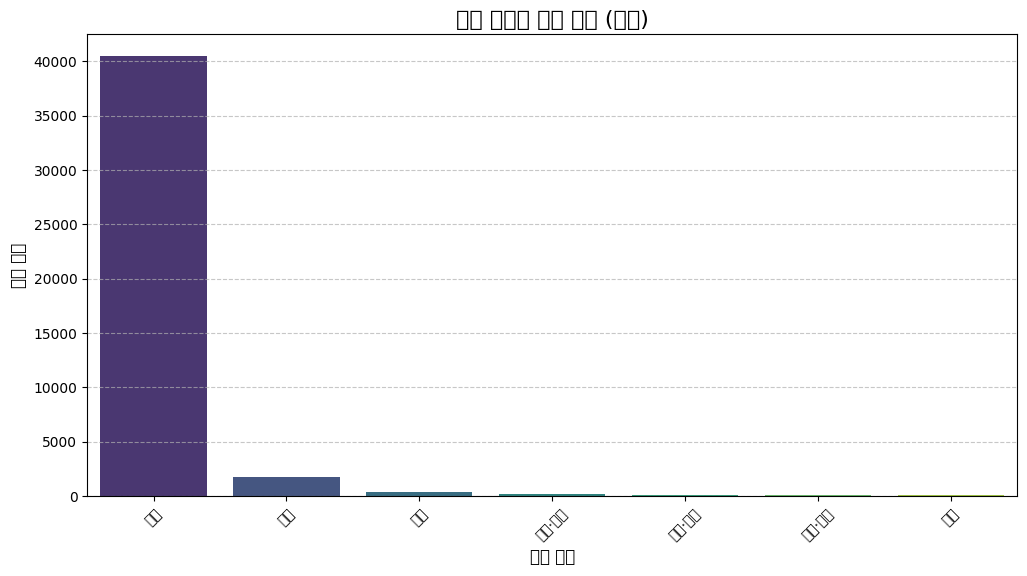

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

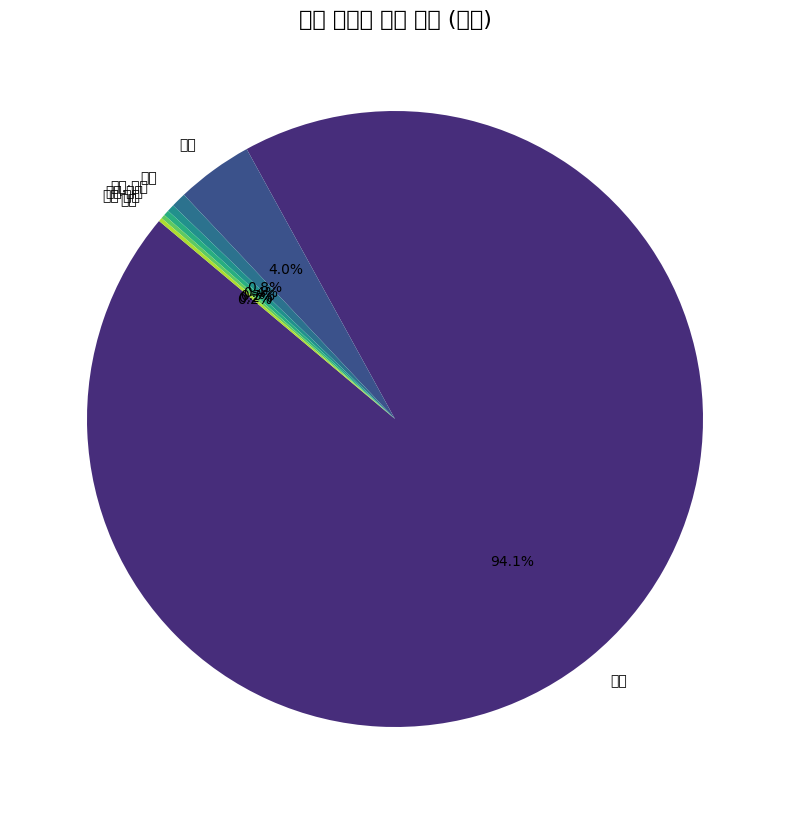


--- 📊 2. 텍스트 길이 분석 ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

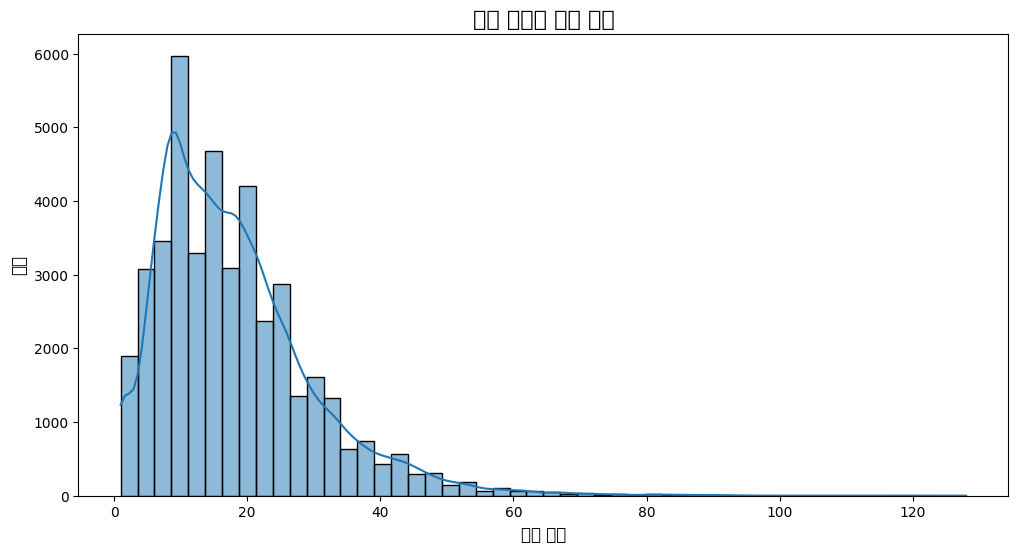

/tmp/ipython-input-2152068974.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='length', order=df['label'].value_counts().index, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserW

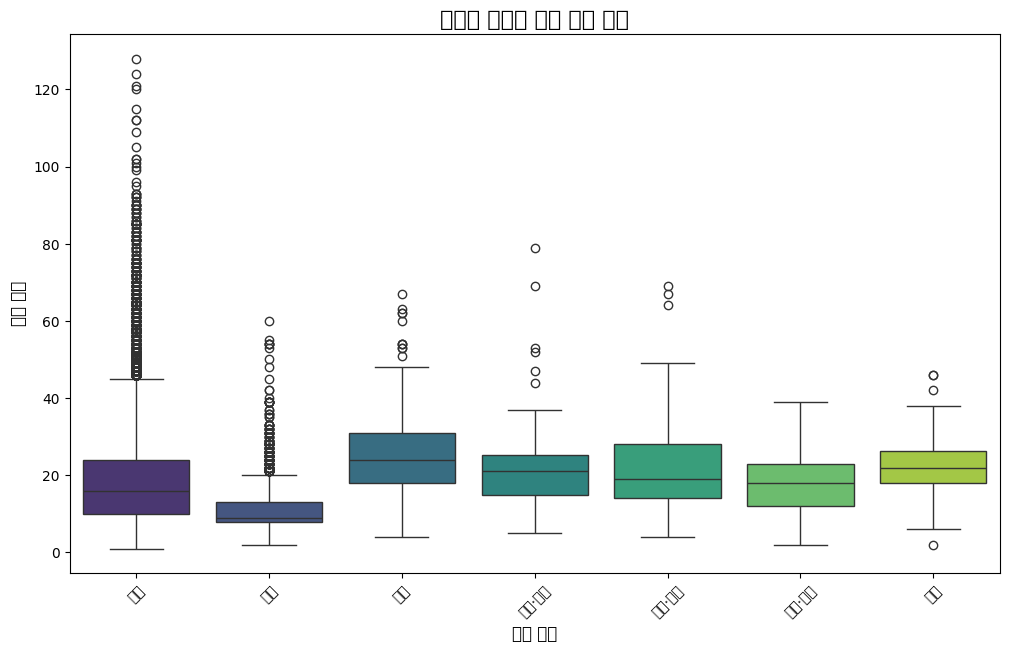


--- 📊 3. 감정별 주요 단어 분석 ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

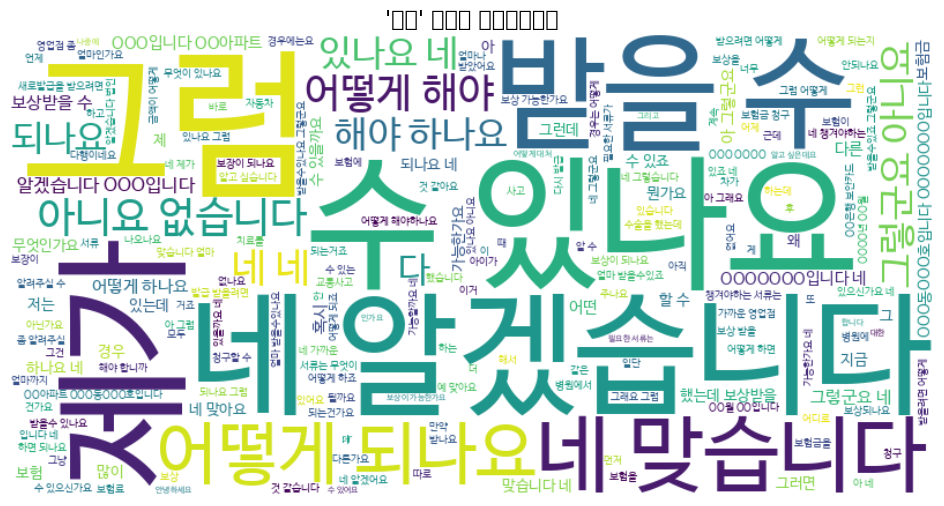

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


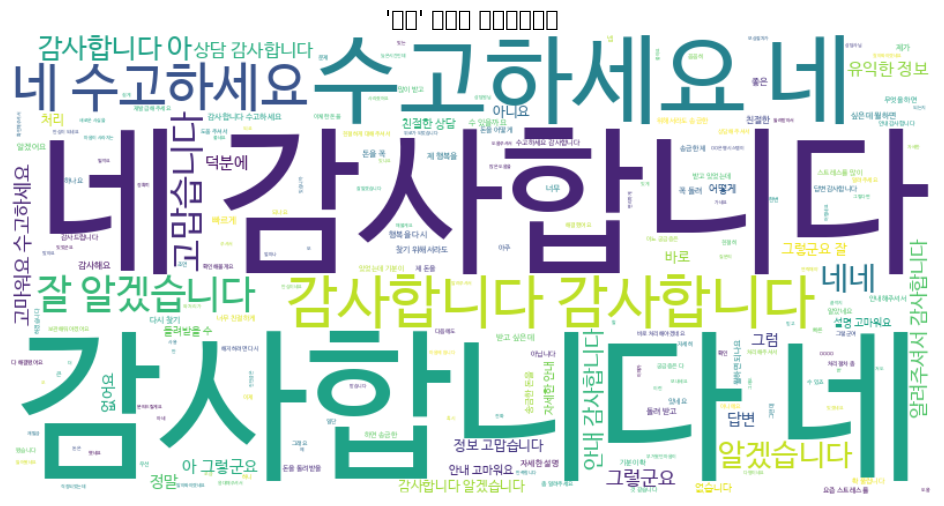

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


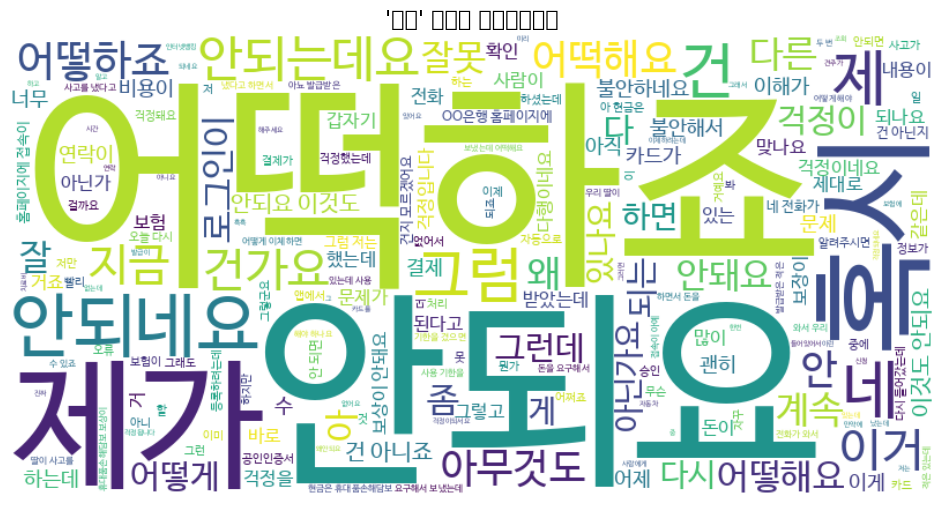

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


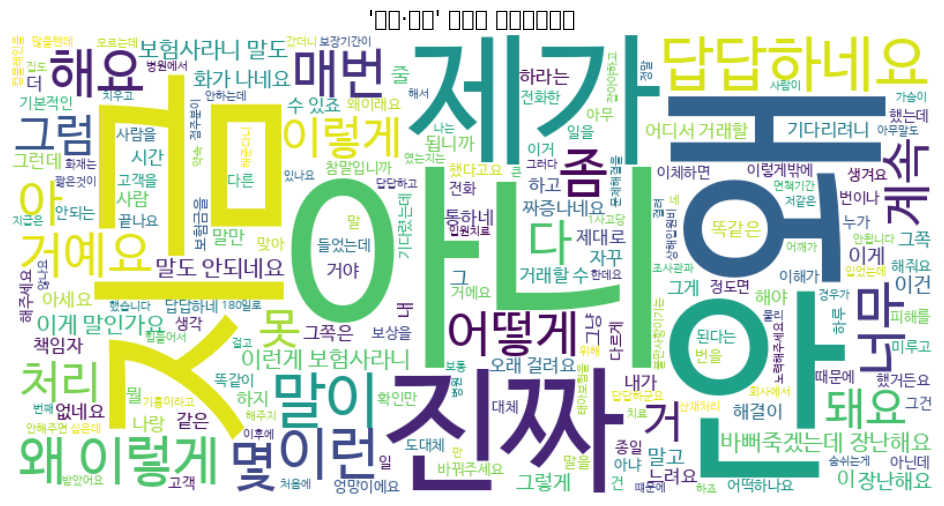

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54548 (\N{HANGUL SYLLABLE PEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


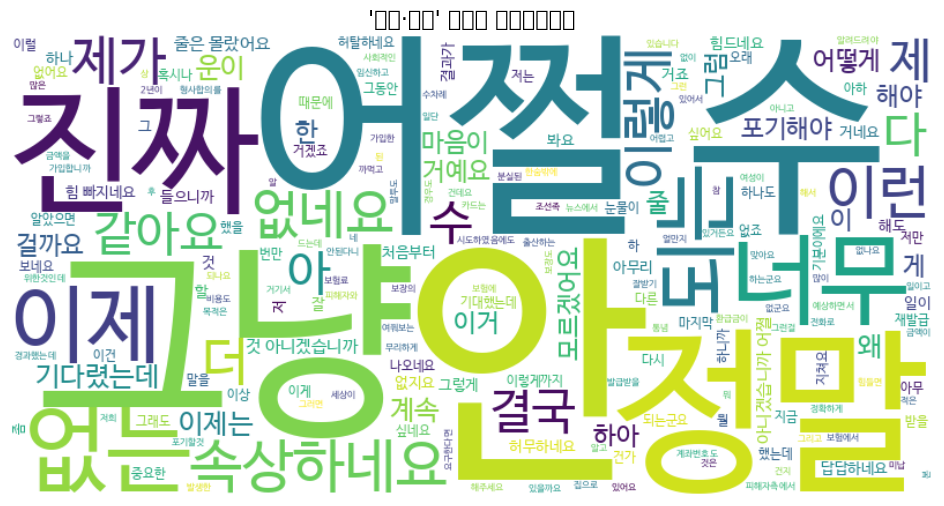

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50837 (\N{HANGUL SYLLABLE YOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


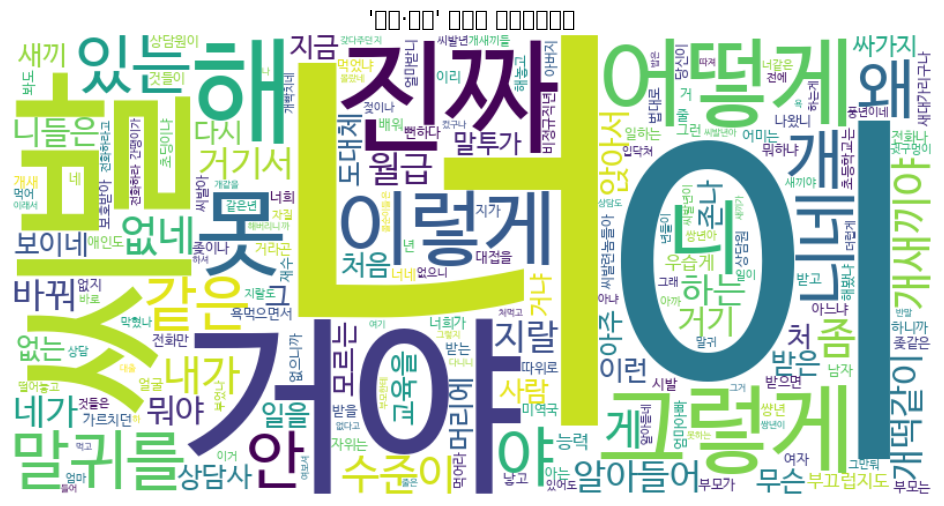

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


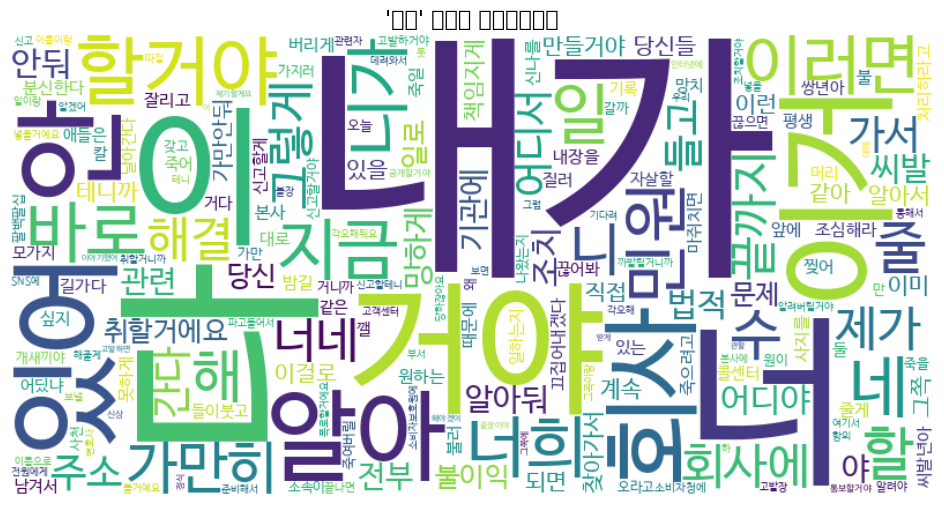

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 폰트 설정을 초기화하고 나눔고딕으로 지정합니다.
plt.rc('font', family='NanumBarunGothic')
# 마이너스 기호가 깨지는 것을 방지합니다.
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
# final_dataset 변수가 이미 있다고 가정합니다.
# 없다면 이전에 실행했던 코드를 먼저 실행해주세요.
df = pd.DataFrame(final_dataset)


#==============================================================================
# 분석 1: 라벨 분포 확인 (개수 및 비율)
#==============================================================================

print("--- 📊 1. 라벨 분포 분석 ---")

# (1) 막대그래프 (Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')
plt.title('학습 데이터 라벨 분포 (개수)', fontsize=16)
plt.xlabel('감정 라벨', fontsize=12)
plt.ylabel('문장 개수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# (2) 원형 차트 (Pie Chart)
label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('viridis', len(label_counts)))
plt.title('학습 데이터 라벨 분포 (비율)', fontsize=16)
plt.ylabel('') # y-label을 제거하여 깔끔하게 보임
plt.show()


#==============================================================================
# 분석 2: 텍스트 길이 분석
#==============================================================================

print("\n--- 📊 2. 텍스트 길이 분석 ---")
df['length'] = df['text'].apply(len)

# (1) 전체 텍스트 길이 분포 (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='length', kde=True, bins=50)
plt.title('전체 텍스트 길이 분포', fontsize=16)
plt.xlabel('문장 길이', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.show()

# (2) 라벨별 텍스트 길이 분포 (Box Plot)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='label', y='length', order=df['label'].value_counts().index, palette='viridis')
plt.title('라벨별 텍스트 길이 분포 비교', fontsize=16)
plt.xlabel('감정 라벨', fontsize=12)
plt.ylabel('문장 길이', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#==============================================================================
# 분석 3: 감정별 주요 단어 (Word Cloud)
#==============================================================================

print("\n--- 📊 3. 감정별 주요 단어 분석 ---")
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 각 라벨별로 워드클라우드를 생성
for label_name in df['label'].value_counts().index:
    text = ' '.join(df[df['label'] == label_name]['text'])

    wordcloud = WordCloud(font_path=font_path,
                          background_color='white',
                          width=800,
                          height=400,
                          colormap='viridis').generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"'{label_name}' 라벨의 워드클라우드", fontsize=16)
    plt.axis('off')
    plt.show()

In [ ]:
import torch
import numpy as np
from transformers import pipeline

# --------------------------------------------------------------------------
# ⭐ [수정] 온도(Temperature) 값 설정
# 1.0보다 큰 값을 설정합니다. (예: 2.0, 3.0, 5.0 등)
# 이 값을 조절하여 확률 분산 정도를 조절할 수 있습니다.
TEMPERATURE = 3.0
# --------------------------------------------------------------------------

# 모델을 평가 모드로 설정
model.eval()

# 토크나이저를 이용한 테스트 문장 준비
test_sentences = [
    "이거 환불 처리 빨리 좀 해주세요.",
    "상담사님 덕분에 문제가 잘 해결됐어요.",
    "만약에 잘못되면 어떡하죠? 너무 걱정돼요.",
    "하... 결국 안된다니 너무 허무하네요.",
    "당신 이름이랑 부서가 어디야. 내가 민원 넣을 거니까.",
    "개새끼야!",
    "너무 과정이 복잡하네요. 해결해주셔서 감사해요.",
    "그건 어디에서 확인할 수 있나요?",
    "빨리 좀 해주시면 감사하겠습니다.",
    "씨발년아 죽여버린다?",
    "그건 어디에서 확인할 수 있나요?",
    "그러니까 그딴 일이나 하고 있지.",
    "지금 저랑 장난하자는 겁니까?",
    "아가씨 결혼은 했어?"
]

# 예측 결과 출력을 위한 함수 정의
def predict_with_temperature(sentences, model, tokenizer, temperature, id_to_label):
    results = []

    # GPU 사용 가능 시 GPU로 이동
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for sentence in sentences:
        # 1. 입력 토큰화
        inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True).to(device)

        with torch.no_grad():
            # 2. 모델 추론 (Logits 얻기)
            outputs = model(**inputs)
            logits = outputs.logits # 최종 Logits 값

            # 3. ⭐ 온도 스케일링 적용: Logits을 T로 나눔
            scaled_logits = logits / temperature

            # 4. Softmax 계산 (확률 분포 얻기)
            probabilities = torch.softmax(scaled_logits, dim=-1).squeeze().cpu().numpy()

        # 5. 결과 포맷팅
        prediction_list = []
        for i, prob in enumerate(probabilities):
            label = id_to_label[i]
            prediction_list.append({
                'label': label,
                'score': prob
            })

        results.append(prediction_list)

    return results

# 예측 실행
results = predict_with_temperature(test_sentences, model, tokenizer, TEMPERATURE, id_to_label)

print(f"\n--- 🤖 모델 예측 결과 (온도 스케일링 T={TEMPERATURE} 적용) ---")
for sentence, result_list in zip(test_sentences, results):
    print(f"💬 입력: {sentence}")

    # 결과를 확률(score)을 기준으로 내림차순 정렬
    sorted_results = sorted(result_list, key=lambda x: x['score'], reverse=True)

    output_parts = []
    for item in sorted_results:
        # 확률을 퍼센트(%)로 변환 (소수점 없이)
        percent = int(round(item['score'] * 100))
        # 0% 확률은 출력에서 제외하거나 표시할 수 있습니다. 여기서는 모두 표시합니다.
        output_parts.append(f"{item['label']} {percent}%")

    # 출력 형식 맞추기
    print(f"▶️ 감정 분석 결과 : {' , '.join(output_parts)}")
    print("-" * 20)


--- 🤖 모델 예측 결과 (온도 스케일링 T=3.0 적용) ---
💬 입력: 이거 환불 처리 빨리 좀 해주세요.
▶️ 감정 분석 결과 : 중립 60% , 불만·짜증 13% , 불안 10% , 슬픔·좌절 6% , 긍정 4% , 모욕·욕설 4% , 위협 3%
--------------------
💬 입력: 상담사님 덕분에 문제가 잘 해결됐어요.
▶️ 감정 분석 결과 : 긍정 90% , 중립 2% , 위협 2% , 슬픔·좌절 2% , 불안 2% , 모욕·욕설 1% , 불만·짜증 1%
--------------------
💬 입력: 만약에 잘못되면 어떡하죠? 너무 걱정돼요.
▶️ 감정 분석 결과 : 불안 84% , 중립 3% , 슬픔·좌절 3% , 위협 3% , 불만·짜증 2% , 긍정 2% , 모욕·욕설 2%
--------------------
💬 입력: 하... 결국 안된다니 너무 허무하네요.
▶️ 감정 분석 결과 : 슬픔·좌절 76% , 불만·짜증 7% , 중립 5% , 불안 4% , 긍정 3% , 위협 3% , 모욕·욕설 3%
--------------------
💬 입력: 당신 이름이랑 부서가 어디야. 내가 민원 넣을 거니까.
▶️ 감정 분석 결과 : 위협 82% , 불만·짜증 4% , 모욕·욕설 3% , 불안 3% , 중립 3% , 긍정 3% , 슬픔·좌절 3%
--------------------
💬 입력: 개새끼야!
▶️ 감정 분석 결과 : 모욕·욕설 77% , 불만·짜증 6% , 위협 4% , 중립 4% , 긍정 3% , 불안 3% , 슬픔·좌절 3%
--------------------
💬 입력: 너무 과정이 복잡하네요. 해결해주셔서 감사해요.
▶️ 감정 분석 결과 : 긍정 90% , 중립 2% , 위협 2% , 슬픔·좌절 2% , 불안 2% , 불만·짜증 1% , 모욕·욕설 1%
--------------------
💬 입력: 그건 어디에서 확인할 수 있나요?
▶️ 감정 분석 결과 : 중립 89% , 불안 3% , 불만·짜증 2% , 슬픔·좌

In [ ]:
import torch
import numpy as np
import pandas as pd

# --------------------------------------------------------------------------
# 1. 스트레스 지수 가중치 및 EMA 설정
# --------------------------------------------------------------------------
STRESS_WEIGHTS = {
    '위협': 1.0,
    '모욕·욕설': 0.9,
    '불만·짜증': 0.5,
    '불안': 0.1,
    '슬픔·좌절': 0.1,
    '중립': 0.0,
    '긍정': -0.5
}
EMA_ALPHA = 0.9
TEMPERATURE = 3.0 # 이전 섹션에서 설정된 온도 값 사용

# --------------------------------------------------------------------------
# 2. 스트레스 지수 계산 및 EMA 갱신 함수
# --------------------------------------------------------------------------
def calculate_stress_index(probabilities, weights):
    stress_index = 0.0
    for item in probabilities:
        label = item['label']
        prob = item['score']
        weight = weights.get(label, 0.0)
        stress_index += (prob * weight)
    return stress_index

def update_ema(current_ema, new_value, alpha):
    """지수이동평균(EMA)을 갱신"""
    return alpha * new_value + (1 - alpha) * current_ema

# --------------------------------------------------------------------------
# 3. 단일 발화 분석 및 갱신 함수
# --------------------------------------------------------------------------
def analyze_and_update(sentence, model, tokenizer, temperature, id_to_label, weights, alpha, current_ema):
    """
    단일 발화를 분석하고 EMA를 갱신하며 결과를 반환.
    """
    # GPU 사용 가능 시 GPU로 이동
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    # 1. 모델 추론 및 확률 계산
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        scaled_logits = logits / temperature
        probabilities = torch.softmax(scaled_logits, dim=-1).squeeze().cpu().numpy()

    # 2. 결과 포맷팅
    result_list = []
    for j, prob in enumerate(probabilities):
        result_list.append({'label': id_to_label[j], 'score': prob})

    # 3. 발화 스트레스 지수 계산
    utterance_stress_index = calculate_stress_index(result_list, weights)

    # 4. 통화 내 EMA 스트레스 지수 갱신
    new_ema = update_ema(current_ema, utterance_stress_index, alpha)

    # 5. 결과 출력 (포맷 맞추기)
    sorted_results = sorted(result_list, key=lambda x: x['score'], reverse=True)

    # 감정 분석 결과 출력 포맷
    output_parts = []
    for item in sorted_results:
        percent = int(round(item['score'] * 100))
        if percent > 0: # 0%는 제외하여 깔끔하게 출력
             output_parts.append(f"{item['label']} {percent}%")

    print("\n" + "="*50)
    print(f"💬 입력 발화: {sentence}")
    print(f"▶️ 감정 분석 결과: {' , '.join(output_parts)}")
    print(f"📈 발화 스트레스 지수: {utterance_stress_index:.4f} (지수: {int(round(utterance_stress_index * 100))})")
    print(f"📊 통화 내 EMA 스트레스 지수 (갱신 후): {new_ema:.4f} (지수: {int(round(new_ema * 100))})")
    print("="*50)

    return new_ema

# --------------------------------------------------------------------------
# 4. 대화형 입력 루프
# --------------------------------------------------------------------------
# 통화 내 누적 스트레스 지수 초기화
cumulative_stress_ema = 0.0
utterance_count = 0

print("--- 🗣️ 통화 스트레스 지수 분석 시뮬레이션 ---")
print("발화를 하나씩 입력하세요. '종료'를 입력하면 분석을 마칩니다.")

while True:
    user_input = input(f"발화 {utterance_count + 1} ('종료' 입력): ")

    if user_input.lower() == '종료':
        print("\n--- 🔚 분석 종료 ---")
        print(f"최종 통화 내 EMA 스트레스 지수: {int(round(cumulative_stress_ema * 100))}")
        break

    if user_input.strip() == "":
        continue

    utterance_count += 1

    # 새로운 발화로 EMA 갱신
    cumulative_stress_ema = analyze_and_update(
        sentence=user_input,
        model=model,
        tokenizer=tokenizer,
        temperature=TEMPERATURE,
        id_to_label=id_to_label,
        weights=STRESS_WEIGHTS,
        alpha=EMA_ALPHA,
        current_ema=cumulative_stress_ema
    )

--- 🗣️ 통화 스트레스 지수 분석 시뮬레이션 ---
발화를 하나씩 입력하세요. '종료'를 입력하면 분석을 마칩니다.

💬 입력 발화: 안녕하세요. 환불 건 때문에 전화드렸어요.
▶️ 감정 분석 결과: 중립 88% , 불안 3% , 불만·짜증 2% , 슬픔·좌절 2% , 모욕·욕설 2% , 긍정 2% , 위협 1%
📈 발화 스트레스 지수: 0.0378 (지수: 4)
📊 통화 내 EMA 스트레스 지수 (갱신 후): 0.0341 (지수: 3)

💬 입력 발화: 아니, 여기서 산 소파 있죠? 배송이 왔는데 찢어져 있었어요.
▶️ 감정 분석 결과: 중립 74% , 불만·짜증 7% , 불안 6% , 슬픔·좌절 5% , 긍정 3% , 모욕·욕설 3% , 위협 2%
📈 발화 스트레스 지수: 0.0802 (지수: 8)
📊 통화 내 EMA 스트레스 지수 (갱신 후): 0.0755 (지수: 8)

💬 입력 발화: 아 진짜 짜증나네. 환불해달라고요.
▶️ 감정 분석 결과: 불만·짜증 76% , 슬픔·좌절 6% , 모욕·욕설 5% , 중립 4% , 불안 3% , 위협 3% , 긍정 3%
📈 발화 스트레스 지수: 0.4510 (지수: 45)
📊 통화 내 EMA 스트레스 지수 (갱신 후): 0.4134 (지수: 41)

💬 입력 발화: 말귀를 못알아들어요? 몇번을 말해야 돼요!
▶️ 감정 분석 결과: 불만·짜증 74% , 모욕·욕설 6% , 슬픔·좌절 6% , 중립 5% , 불안 3% , 위협 3% , 긍정 2%
📈 발화 스트레스 지수: 0.4562 (지수: 46)
📊 통화 내 EMA 스트레스 지수 (갱신 후): 0.4519 (지수: 45)

💬 입력 발화: 이새끼들아 일을 좀 제대로 해!
▶️ 감정 분석 결과: 모욕·욕설 76% , 불만·짜증 7% , 위협 4% , 중립 4% , 긍정 3% , 슬픔·좌절 3% , 불안 3%
📈 발화 스트레스 지수: 0.7514 (지수: 75)
📊 통화 내 EMA 스트레스 지수 (갱신 후): 0.7214 (지수: 72)

💬 입력 발화: 죽여 버린다